# Notebook para usarmos no Desafio 2!


Podemos começar a trabalhar de vez daqui para baixo. Segue a definição dos datasets:

In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived. **bold text**

## Importação de Bibliotecas e Banco de dados

In [1]:
#! pip install pyjanitor
#! pip install plotly_express
#! pip install imblearn

In [2]:
import janitor
import pandas as pd
import pandas_profiling as prf
import matplotlib.pyplot as plt
import plotly_express as px
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy
from scipy import stats
import seaborn as sns
import statsmodels
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
import math 
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, precision_recall_curve
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

le = preprocessing.LabelBinarizer()
pd.set_option('display.max_columns', None)  

##Alterando alguns valores do Matplot
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

%matplotlib inline
plt.rcParams.update(params)

In [3]:
df = pd.read_csv(r'train.csv')
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Análise exploratória

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in greater

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in less



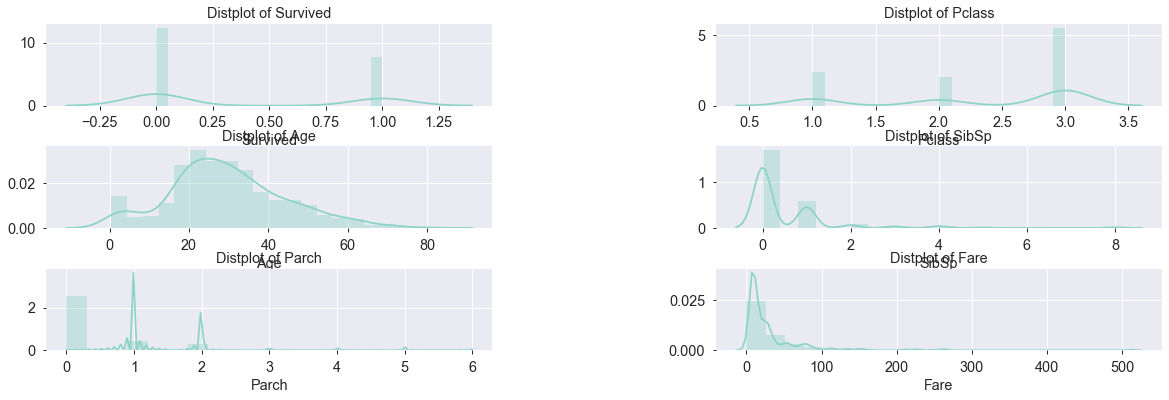

In [5]:
plt.figure(1 , figsize = (20 , 6))
n = 0 
for x in ['Survived' , 'Pclass' ,'Age','SibSp','Parch','Fare']:
    n += 1
    plt.subplot(3 , 2 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [6]:
##Retira os dois passageiros que nao embarcaram 
df = df.loc[df['Embarked'].isnull()==False]

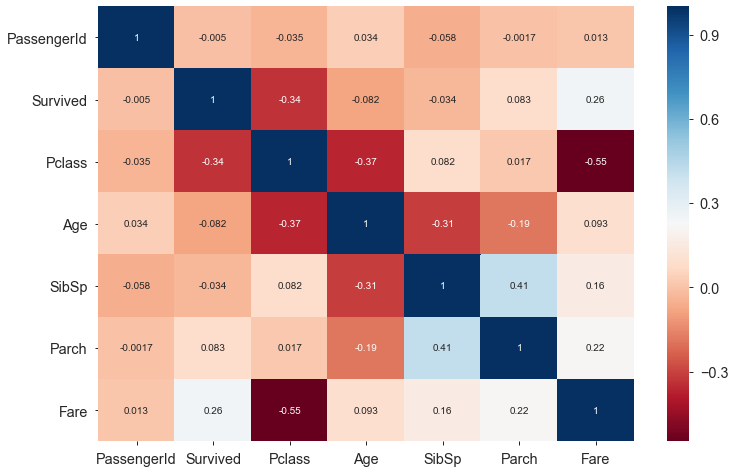

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap=plt.cm.RdBu, annot=True)

In [8]:
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [9]:
fig = px.histogram(df.sort_values(by=['Pclass']), x = "Sex",color="Sex", facet_col="Pclass", facet_row = "Survived")
fig.show()

# Explorando a Variável Age

* Iremos usar a media das idades com Base no Sexo das Pessoa e a Classe para determinar as idades que estam igual a ZERO
* Iremos determinar agrupamentos de idades 
  * IsAdulto a partir de 18 anos
  * Agrupamento de Idades a partir do Describe

**GAP: gerar uma regresao linear para determinar as idades ao inves da media e verificar se melhora nosso algoritimo**

In [10]:
df['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
fig = px.box(df.sort_values(by=['Pclass']), x = "Sex",color="Sex", y="Age", facet_col="Pclass")
fig.show()

In [12]:
## Ajusta as idades NaN
df['FE_Age'] = np.where(df['Age'].isnull(), 0,df['Age'])

##Determina as idades com valores ZERO
## FE_AGE ESTA UTILIZANDO A MEDIANA NO CASO DAS IDADES NULAS 
##Class 1
df['FE_Age'] = np.where((df['FE_Age']==0)&(df['Sex']=="female")&(df['Pclass']==1), 35, df['FE_Age'])
df['FE_Age'] = np.where((df['FE_Age']==0)&(df['Sex']=="male")&(df['Pclass']==1), 40 , df['FE_Age'])

##Class 2
df['FE_Age'] = np.where((df['FE_Age']==0)&(df['Sex']=="female")&(df['Pclass']==2),28 , df['FE_Age'])
df['FE_Age'] = np.where((df['FE_Age']==0)&(df['Sex']=="male")&(df['Pclass']==2),30 , df['FE_Age'])

##Class 3
df['FE_Age'] = np.where((df['FE_Age']==0)&(df['Sex']=="female")&(df['Pclass']==3),21.5 , df['FE_Age'])
df['FE_Age'] = np.where((df['FE_Age']==0)&(df['Sex']=="male")&(df['Pclass']==3),25 , df['FE_Age'])

## Cria agrupamento se o individui é adulto
df['FE_IsAdulto'] = np.where(df['Age'] > 18, 1,0)


In [13]:
df['FE_Age'].describe()

count    889.000000
mean      29.065433
std       13.270162
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: FE_Age, dtype: float64

In [14]:
##Group_Age 1
df.loc [df['FE_Age'] <= 20 ,'FE_GroupAge'] =0
##Group_Age 2
df.loc [(df['FE_Age'] > 20) & (df['FE_Age'] <=28) , 'FE_GroupAge']=1
##Group_Age 3
df.loc [(df['FE_Age'] > 28) & (df['FE_Age'] <=38) , 'FE_GroupAge']=2
##Group_Age 4
df.loc [df['FE_Age'] > 38 ,'FE_GroupAge'] =3


In [15]:
df['FE_GroupAge'].value_counts()

1.0    321
3.0    197
2.0    192
0.0    179
Name: FE_GroupAge, dtype: int64

In [16]:
fig = px.histogram(df, x = "FE_GroupAge",color="FE_GroupAge", facet_row = "Survived")
fig.show()

# Explorando a variavel Fare 

*   Determinar o valor para Fare **ZERADO**
*   Separacao em agrupamementos tomando como base do discribe da variavel
    * menor a 25%; (1)
    * entre 25% e 50% (2) 
    * maior a 75%. (3)


**GAP: gerar uma regresao linear para determinar os precos das passagens ao inves da media e verificar se melhora nosso algoritimo**

In [17]:
df['Fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [18]:
df.loc[df['Fare']==0].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FE_Age,FE_IsAdulto,FE_GroupAge
count,15.000000,15.000000,15.000000,7.000000,15.0,15.0,15.0,15.000000,15.000000,15.000000
mean,516.400000,0.066667,1.933333,35.142857,0.0,0.0,0.0,33.733333,0.466667,2.133333
std,225.808958,0.258199,0.798809,10.023781,0.0,0.0,0.0,7.459095,0.516398,0.833809
min,180.000000,0.000000,1.000000,19.000000,0.0,0.0,0.0,19.000000,0.000000,0.000000
25%,290.500000,0.000000,1.000000,30.500000,0.0,0.0,0.0,30.000000,0.000000,2.000000
50%,482.000000,0.000000,2.000000,38.000000,0.0,0.0,0.0,30.000000,0.000000,2.000000
75%,704.000000,0.000000,2.500000,39.500000,0.0,0.0,0.0,39.500000,1.000000,3.000000
max,823.000000,1.000000,3.000000,49.000000,0.0,0.0,0.0,49.000000,1.000000,3.000000


In [19]:
fig = px.histogram(df.loc[df['Fare']==0],  x="Sex", facet_col="Pclass",title="Sobreviventes Nao pagantes por Classe")
fig.show()

In [20]:
df_fare = df.loc[df['Fare']>0]
fig = px.box(df_fare.sort_values(by=['Pclass']),  y="Fare", facet_col="Pclass",title="Preco por Classe")
fig.show()

In [21]:
#Atribui valor a Fare = 0: Base Media de pagamento por classe.

##Class 1
df['Fare'] = np.where((df['Fare']==0)&(df['Pclass']==1), 61.37, df['Fare'])
##Class 2
df['Fare'] = np.where((df['Fare']==0)&(df['Pclass']==2),15.02 , df['Fare'])
##Class 3
df['Fare'] = np.where((df['Fare']==0)&(df['Pclass']==3),8.05 , df['Fare'])

In [22]:
df['Fare'].describe()

count    889.000000
mean      32.579437
std       49.614582
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

In [23]:
##Agrupamento do Fare
df.loc [df['Fare'] <= 7.91 ,'FE_Fare'] =0
df.loc [(df['Fare'] > 7.91) & (df['Fare'] <=14.49) , 'FE_Fare']=1
df.loc [(df['Fare'] > 14.49) & (df['Fare'] <=31.27) , 'FE_Fare']=2
df.loc [df['Fare'] > 31.27 ,'FE_Fare'] =3

# Explorando a variável Cabin

* Cria agrupamentos tomando como base a primeira posição da informação


In [24]:
df['FE_AreaCabin'] = df["Cabin"].str.slice(0,1)
df['FE_AreaCabin'] = np.where(df['FE_AreaCabin'].isnull()==True, "0", df['FE_AreaCabin'])

In [25]:
df['FE_AreaCabin'].value_counts()

0    687
C     59
B     45
D     33
E     32
A     15
F     13
G      4
T      1
Name: FE_AreaCabin, dtype: int64

# Explorando a variável SiSp e Parch

* Determina se é um viajante sozinho ou não (IsAlone)

In [26]:
df['IsAlone'] = np.where((df['Parch']==0)&(df['SibSp']==0),True , False)

In [27]:
df['IsAlone'].value_counts()

True     535
False    354
Name: IsAlone, dtype: int64

In [28]:
fig = px.histogram(df.sort_values(by=['Pclass']),  x="IsAlone",color="IsAlone", facet_col="Pclass", facet_row="Survived" , title="Gráfico IsAlone")
fig.show()

# Criando os Dummy´s e Definindo o DataFrame para modelo

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FE_Age,FE_IsAdulto,FE_GroupAge,FE_Fare,FE_AreaCabin,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1,1.0,0.0,0,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,1,2.0,3.0,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,1,1.0,1.0,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,1,2.0,3.0,C,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,1,2.0,1.0,0,True


In [30]:
df_modelo = pd.concat([df, pd.get_dummies(df['Sex'].astype(object), prefix='Sex', drop_first=True)], axis=1)
df_modelo = pd.concat([df_modelo, pd.get_dummies(df['Embarked'].astype(object), prefix='Embarked', drop_first=True)], axis=1)
df_modelo = pd.concat([df_modelo, pd.get_dummies(df['FE_GroupAge'].astype(object), prefix='FE_GroupAge', drop_first=True)], axis=1)
df_modelo = pd.concat([df_modelo, pd.get_dummies(df['FE_Fare'].astype(object), prefix='FE_Fare', drop_first=True)], axis=1)
df_modelo = pd.concat([df_modelo, pd.get_dummies(df['Pclass'].astype(object), prefix='Pclass', drop_first=True)], axis=1)
df_modelo = pd.concat([df_modelo, pd.get_dummies(df['IsAlone'].astype(object), prefix='IsAlone', drop_first=True)], axis=1)

In [31]:
df_modelo = df_modelo.drop(columns = ['PassengerId','Name','Sex','Ticket', 'Fare', 'Cabin', 'Embarked', 'FE_AreaCabin', 'FE_GroupAge', 'FE_Fare', "Pclass",'IsAlone'],axis = 1)
df_modelo.head()

,Survived,Age,SibSp,Parch,FE_Age,FE_IsAdulto,Sex_male,Embarked_Q,Embarked_S,FE_GroupAge_1.0,FE_GroupAge_2.0,FE_GroupAge_3.0,FE_Fare_1.0,FE_Fare_2.0,FE_Fare_3.0,Pclass_2,Pclass_3,IsAlone_True
0,0,22.0,1,0,22.0,1,1,0,1,1,0,0,0,0,0,0,1,0
1,1,38.0,1,0,38.0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,1,26.0,0,0,26.0,1,0,0,1,1,0,0,1,0,0,0,1,1
3,1,35.0,1,0,35.0,1,0,0,1,0,1,0,0,0,1,0,0,0
4,0,35.0,0,0,35.0,1,1,0,1,0,1,0,1,0,0,0,1,1


In [32]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 18 columns):
Survived           889 non-null int64
Age                712 non-null float64
SibSp              889 non-null int64
Parch              889 non-null int64
FE_Age             889 non-null float64
FE_IsAdulto        889 non-null int32
Sex_male           889 non-null uint8
Embarked_Q         889 non-null uint8
Embarked_S         889 non-null uint8
FE_GroupAge_1.0    889 non-null uint8
FE_GroupAge_2.0    889 non-null uint8
FE_GroupAge_3.0    889 non-null uint8
FE_Fare_1.0        889 non-null uint8
FE_Fare_2.0        889 non-null uint8
FE_Fare_3.0        889 non-null uint8
Pclass_2           889 non-null uint8
Pclass_3           889 non-null uint8
IsAlone_True       889 non-null uint8
dtypes: float64(2), int32(1), int64(3), uint8(12)
memory usage: 55.6 KB


# Realizada o treino do Modelo através do Metodo de Regressão Logistica

In [33]:
def CMatrix(CM,labels =['Survived','Not_Survived']):
    df = pd.DataFrame( data = CM, index = labels, columns = labels)
    df.index.name ='Real'
    df.columns.name = 'Previsto'
    df.loc['Total']= df.sum()
    df['Total']= df.sum(axis=1)
    return df 

In [34]:
def regressao_logistica(X, y, oversampling):
  Y = le.fit_transform(y)
  Y = np.ravel(Y)
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=123,stratify=Y)
  
  X_train_res = X_train
  y_train_res = y_train
  
  if oversampling == 1:
    sm = SMOTE(random_state=1234)
    X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
  
    
  logistic_regression= LogisticRegression(solver = 'sag', max_iter = 5000)
  log = logistic_regression.fit(X_train_res,y_train_res)
  
  y_pred_test_log = logistic_regression.predict(X_test)
  acuracia_log = accuracy_score(y_pred=y_pred_test_log,y_true=y_test)
  precisao_log = precision_score(y_pred=y_pred_test_log,y_true=y_test)
  recall_log = recall_score(y_pred=y_pred_test_log,y_true=y_test)
  %precision
  CM= confusion_matrix(y_pred=y_pred_test_log,y_true=y_test)
  print("Precisão:", precisao_log, "Acuracia:", acuracia_log, "Recall:", recall_log)
  matriz = CMatrix(CM) 
  print(matriz)
  return matriz , acuracia_log, precisao_log, recall_log, log

## Modelo 1 - usando os GroupAge

In [35]:
df_modelo1 = df_modelo.drop(columns=['Age', "FE_Age"], axis=1)
df_modelo1.head()
X1 = df_modelo1.iloc[:,1:]
y1 = df_modelo1.iloc[:,0]

In [36]:
RM1_balanceado = regressao_logistica(X1, y1, 1)

Precisão: 0.7522935779816514 Acuracia: 0.8239700374531835 Recall: 0.803921568627451
Previsto      Survived  Not_Survived  Total
Real                                       
Survived           138            27    165
Not_Survived        20            82    102
Total              158           109    267


In [37]:
RM1_nao_balanceado = regressao_logistica(X1, y1, 0)

Precisão: 0.7731958762886598 Acuracia: 0.8164794007490637 Recall: 0.7352941176470589
Previsto      Survived  Not_Survived  Total
Real                                       
Survived           143            22    165
Not_Survived        27            75    102
Total              170            97    267


# Modelo 2 - usando o FE_Age

In [38]:
df_modelo2 = df_modelo.drop(columns=['Age', 'FE_GroupAge_1.0','FE_GroupAge_2.0','FE_GroupAge_3.0' ], axis=1)
df_modelo2.head()
X2 = df_modelo2.iloc[:,1:]
y2 = df_modelo2.iloc[:,0]

In [39]:
RM2_balanceado = regressao_logistica(X2, y2, 1)

Precisão: 0.7024793388429752 Acuracia: 0.8014981273408239 Recall: 0.8333333333333334
Previsto      Survived  Not_Survived  Total
Real                                       
Survived           129            36    165
Not_Survived        17            85    102
Total              146           121    267


In [40]:
RM2_nao_balanceado = regressao_logistica(X2, y2, 0)

Precisão: 0.7835051546391752 Acuracia: 0.8239700374531835 Recall: 0.7450980392156863
Previsto      Survived  Not_Survived  Total
Real                                       
Survived           144            21    165
Not_Survived        26            76    102
Total              170            97    267


# Modelo 3 - usando regressão linear para definir Age = NULL

In [41]:
df_modelo3 = df_modelo.drop(columns=["FE_Age", 'FE_GroupAge_1.0','FE_GroupAge_2.0','FE_GroupAge_3.0' ], axis=1)
df_modelo3.head()


,Survived,Age,SibSp,Parch,FE_IsAdulto,Sex_male,Embarked_Q,Embarked_S,FE_Fare_1.0,FE_Fare_2.0,FE_Fare_3.0,Pclass_2,Pclass_3,IsAlone_True
0,0,22.0,1,0,1,1,0,1,0,0,0,0,1,0
1,1,38.0,1,0,1,0,0,0,0,0,1,0,0,0
2,1,26.0,0,0,1,0,0,1,1,0,0,0,1,1
3,1,35.0,1,0,1,0,0,1,0,0,1,0,0,0
4,0,35.0,0,0,1,1,0,1,1,0,0,0,1,1


In [42]:
df_modelo3 = df_modelo3.clean_names()
df_modelo3.head()

,survived,age,sibsp,parch,fe_isadulto,sex_male,embarked_q,embarked_s,fe_fare_1_0,fe_fare_2_0,fe_fare_3_0,pclass_2,pclass_3,isalone_true
0,0,22.0,1,0,1,1,0,1,0,0,0,0,1,0
1,1,38.0,1,0,1,0,0,0,0,0,1,0,0,0
2,1,26.0,0,0,1,0,0,1,1,0,0,0,1,1
3,1,35.0,1,0,1,0,0,1,0,0,1,0,0,0
4,0,35.0,0,0,1,1,0,1,1,0,0,0,1,1


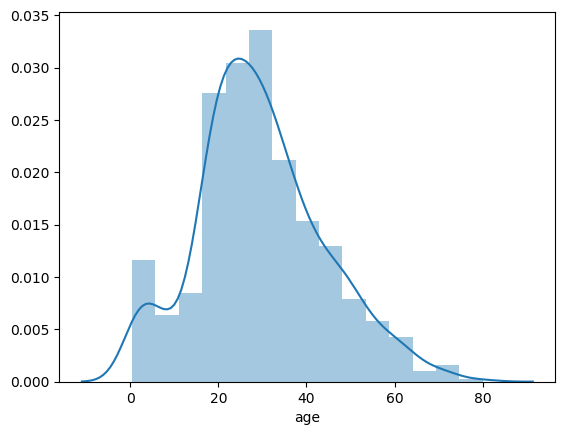

In [43]:
plt.rcdefaults()

df_age_not_null = df_modelo3.query('age > 0')
ax = sns.distplot(df_age_not_null['age'], bins = 15)

plt.rcParams.update(params)


In [44]:
# Teste de Kolgomorov-Smirnov: pvalue menor que alfa, ou seja, rejeita Ho (distribuição normal)
stats.kstest(df_age_not_null['age'],cdf='norm')

KstestResult(statistic=0.9649422367998306, pvalue=0.0)

In [45]:
regressao_idade = smf.ols ('age~sibsp+parch+fe_isadulto+sex_male+embarked_q+embarked_s+fe_fare_1_0+fe_fare_2_0+fe_fare_3_0+pclass_2+pclass_3+isalone_true', df_age_not_null).fit()

In [46]:
print(regressao_idade.summary())

OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     56.49
Date:                Sun, 27 Oct 2019   Prob (F-statistic):           1.70e-94
Time:                        21:54:58   Log-Likelihood:                -2672.1
No. Observations:                 712   AIC:                             5370.
Df Residuals:                     699   BIC:                             5430.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       17.5756      2.530      6.948      0.000      12.609      22

In [47]:
regressao_idade2 = smf.ols ('age~fe_isadulto+pclass_2+pclass_3', df_age_not_null).fit()

In [48]:
print(regressao_idade2.summary())

OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 27 Oct 2019   Prob (F-statistic):          7.19e-100
Time:                        21:54:58   Log-Likelihood:                -2681.1
No. Observations:                 712   AIC:                             5370.
Df Residuals:                     708   BIC:                             5389.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      18.2147      1.202     15.147      0.000      15.854      20.57

In [49]:
x_predict_age = df_modelo3.iloc[:,2:]

In [50]:
df_modelo3_predict = df_modelo3
df_modelo3_predict['Age_Predict'] = np.where(df_modelo3['age'] > 0, df_modelo3['age'] , regressao_idade.predict(x_predict_age))
df_modelo3.head()

,survived,age,sibsp,parch,fe_isadulto,sex_male,embarked_q,embarked_s,fe_fare_1_0,fe_fare_2_0,fe_fare_3_0,pclass_2,pclass_3,isalone_true,Age_Predict
0,0,22.0,1,0,1,1,0,1,0,0,0,0,1,0,22.0
1,1,38.0,1,0,1,0,0,0,0,0,1,0,0,0,38.0
2,1,26.0,0,0,1,0,0,1,1,0,0,0,1,1,26.0
3,1,35.0,1,0,1,0,0,1,0,0,1,0,0,0,35.0
4,0,35.0,0,0,1,1,0,1,1,0,0,0,1,1,35.0


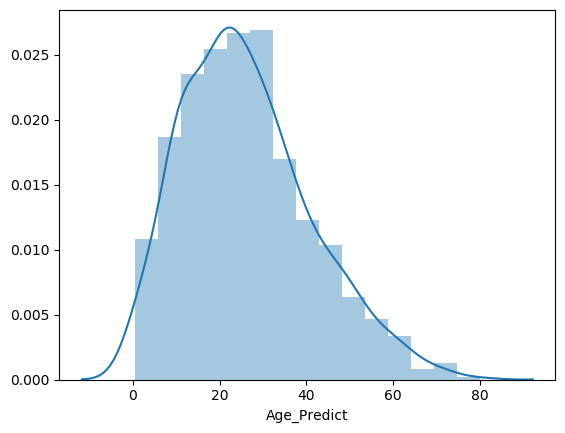

In [51]:
plt.rcdefaults()

ax = sns.distplot(df_modelo3_predict['Age_Predict'], bins = 15)

plt.rcParams.update(params)

In [52]:
df_modelo3_predict.drop(columns='age', axis=1,inplace=True)
df_modelo3.info()

X3 = df_modelo3.iloc[:,1:]
y3 = df_modelo2.iloc[:,0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
survived        889 non-null int64
sibsp           889 non-null int64
parch           889 non-null int64
fe_isadulto     889 non-null int32
sex_male        889 non-null uint8
embarked_q      889 non-null uint8
embarked_s      889 non-null uint8
fe_fare_1_0     889 non-null uint8
fe_fare_2_0     889 non-null uint8
fe_fare_3_0     889 non-null uint8
pclass_2        889 non-null uint8
pclass_3        889 non-null uint8
isalone_true    889 non-null uint8
Age_Predict     889 non-null float64
dtypes: float64(1), int32(1), int64(3), uint8(9)
memory usage: 46.0 KB


In [53]:
RM3_balanceado = regressao_logistica(X3, y3, 1)

Precisão: 0.7142857142857143 Acuracia: 0.8089887640449438 Recall: 0.8333333333333334
Previsto      Survived  Not_Survived  Total
Real                                       
Survived           131            34    165
Not_Survived        17            85    102
Total              148           119    267


In [54]:
RM3_nao_balanceado = regressao_logistica(X3, y3, 0)

Precisão: 0.7578947368421053 Acuracia: 0.8014981273408239 Recall: 0.7058823529411765
Previsto      Survived  Not_Survived  Total
Real                                       
Survived           142            23    165
Not_Survived        30            72    102
Total              172            95    267


# Modelo 4 - TBD (por enquanto, igual modelo 2)

In [55]:
df_modelo4 = df_modelo.drop(columns=['Age', 'FE_GroupAge_1.0','FE_GroupAge_2.0','FE_GroupAge_3.0' ], axis=1)
df_modelo4.head()
X4 = df_modelo2.iloc[:,1:]
y4 = df_modelo2.iloc[:,0]

In [56]:
RM4_balanceado = regressao_logistica(X4, y4, 1)

Precisão: 0.7024793388429752 Acuracia: 0.8014981273408239 Recall: 0.8333333333333334
Previsto      Survived  Not_Survived  Total
Real                                       
Survived           129            36    165
Not_Survived        17            85    102
Total              146           121    267


In [57]:
RM4_nao_balanceado = regressao_logistica(X4, y4, 0)

Precisão: 0.7835051546391752 Acuracia: 0.8239700374531835 Recall: 0.7450980392156863
Previsto      Survived  Not_Survived  Total
Real                                       
Survived           144            21    165
Not_Survived        26            76    102
Total              170            97    267


# Comparativo entre todos os modelos

In [58]:
#comparativo de precisão de todoas os modelos (vencedor até o momento: regressão do modelo 1 com oversampling)

print(RM1_balanceado[1])
print(RM1_nao_balanceado[1])
print(RM2_balanceado[1])
print(RM2_nao_balanceado[1])
print(RM3_balanceado[1])
print(RM3_nao_balanceado[1])

0.8239700374531835
0.8164794007490637
0.8014981273408239
0.8239700374531835
0.8089887640449438
0.8014981273408239


# Modelo de Predição usando a base completa (sem separar treino e teste)

In [59]:
def regressao_logistica_final(X, y, oversampling):
  y = le.fit_transform(y)
  y = np.ravel(y)
  
  if oversampling == 1:
    sm = SMOTE(random_state=1234)
    X, y = sm.fit_sample(X, y)
  

  logistic_regression = LogisticRegression(solver = 'sag', max_iter = 5000)
  log = logistic_regression.fit(X,y)
  
  return log

In [60]:
# fazendo a regressão definitiva usando o Modelo 1 com oversampling
RM_definitivo = regressao_logistica_final(X1, y1, 1)

# Fazendo os mesmo tratamentos com a base de produção (treino) do Keagle

In [75]:
df_producao = pd.read_csv(r'test.csv')
df_producao.head() 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [76]:
##Retira os dois passageiros que nao embarcaram 
df_producao = df_producao.loc[df_producao['Embarked'].isnull()==False]

In [77]:
## Ajusta as idades NaN
df_producao['FE_Age'] = np.where(df_producao['Age'].isnull(), 0,df_producao['Age'])

##Determina as idades com valores ZERO
## FE_AGE ESTA UTILIZANDO A MEDIANA NO CASO DAS IDADES NULAS 
##Class 1
df_producao['FE_Age'] = np.where((df_producao['FE_Age']==0)&(df_producao['Sex']=="female")&(df_producao['Pclass']==1), 35, df_producao['FE_Age'])
df_producao['FE_Age'] = np.where((df_producao['FE_Age']==0)&(df_producao['Sex']=="male")&(df_producao['Pclass']==1), 40 , df_producao['FE_Age'])

##Class 2
df_producao['FE_Age'] = np.where((df_producao['FE_Age']==0)&(df_producao['Sex']=="female")&(df_producao['Pclass']==2),28 , df_producao['FE_Age'])
df_producao['FE_Age'] = np.where((df_producao['FE_Age']==0)&(df_producao['Sex']=="male")&(df_producao['Pclass']==2),30 , df_producao['FE_Age'])

##Class 3
df_producao['FE_Age'] = np.where((df_producao['FE_Age']==0)&(df_producao['Sex']=="female")&(df_producao['Pclass']==3),21.5 , df_producao['FE_Age'])
df_producao['FE_Age'] = np.where((df_producao['FE_Age']==0)&(df_producao['Sex']=="male")&(df_producao['Pclass']==3),25 , df_producao['FE_Age'])

## Cria agrupamento se o individui é adulto
df_producao['FE_IsAdulto'] = np.where(df_producao['Age'] > 18, 1,0)


In [78]:
##Group_Age 1
df_producao.loc [df_producao['FE_Age'] <= 20 ,'FE_GroupAge'] =0
##Group_Age 2
df_producao.loc [(df_producao['FE_Age'] > 20) & (df_producao['FE_Age'] <=28) , 'FE_GroupAge']=1
##Group_Age 3
df_producao.loc [(df_producao['FE_Age'] > 28) & (df_producao['FE_Age'] <=38) , 'FE_GroupAge']=2
##Group_Age 4
df_producao.loc [df_producao['FE_Age'] > 38 ,'FE_GroupAge'] =3


In [79]:
#Atribui valor a Fare = 0: Base Media de pagamento por classe.

##Class 1
df_producao['Fare'] = np.where((df_producao['Fare']==0)&(df_producao['Pclass']==1), 61.37, df_producao['Fare'])
##Class 2
df_producao['Fare'] = np.where((df_producao['Fare']==0)&(df_producao['Pclass']==2),15.02 , df_producao['Fare'])
##Class 3
df_producao['Fare'] = np.where((df_producao['Fare']==0)&(df_producao['Pclass']==3),8.05 , df_producao['Fare'])

In [80]:
##Agrupamento do Fare
df_producao.loc [df_producao['Fare'] <= 7.91 ,'FE_Fare'] =0
df_producao.loc [(df_producao['Fare'] > 7.91) & (df_producao['Fare'] <=14.49) , 'FE_Fare']=1
df_producao.loc [(df_producao['Fare'] > 14.49) & (df_producao['Fare'] <=31.27) , 'FE_Fare']=2
df_producao.loc [df_producao['Fare'] > 31.27 ,'FE_Fare'] =3

In [81]:
df_producao['FE_AreaCabin'] = df_producao["Cabin"].str.slice(0,1)
df_producao['FE_AreaCabin'] = np.where(df_producao['FE_AreaCabin'].isnull()==True, "0", df_producao['FE_AreaCabin'])

In [82]:
df_producao['IsAlone'] = np.where((df_producao['Parch']==0)&(df_producao['SibSp']==0),True , False)

# Criando a predição para a base de produção

In [83]:
df_producao_predict = pd.concat([df_producao, pd.get_dummies(df_producao['Sex'].astype(object), prefix='Sex', drop_first=True)], axis=1)
df_producao_predict = pd.concat([df_producao_predict, pd.get_dummies(df_producao_predict['Embarked'].astype(object), prefix='Embarked', drop_first=True)], axis=1)
df_producao_predict = pd.concat([df_producao_predict, pd.get_dummies(df_producao_predict['FE_GroupAge'].astype(object), prefix='FE_GroupAge', drop_first=True)], axis=1)
df_producao_predict = pd.concat([df_producao_predict, pd.get_dummies(df_producao_predict['FE_Fare'].astype(object), prefix='FE_Fare', drop_first=True)], axis=1)
df_producao_predict = pd.concat([df_producao_predict, pd.get_dummies(df_producao_predict['Pclass'].astype(object), prefix='Pclass', drop_first=True)], axis=1)
df_producao_predict = pd.concat([df_producao_predict, pd.get_dummies(df_producao_predict['IsAlone'].astype(object), prefix='IsAlone', drop_first=True)], axis=1)

In [90]:
df_producao_predict = df_producao_predict.drop(columns = ['Name','Sex','Ticket', 'Fare', 'Cabin', 'Embarked', 'FE_AreaCabin', 'FE_GroupAge', 'FE_Fare', "Pclass",'IsAlone', 'Age', 'FE_Age'],axis = 1)
df_producao_predict.head()

,PassengerId,SibSp,Parch,FE_IsAdulto,Sex_male,Embarked_Q,Embarked_S,FE_GroupAge_1.0,FE_GroupAge_2.0,FE_GroupAge_3.0,FE_Fare_1.0,FE_Fare_2.0,FE_Fare_3.0,Pclass_2,Pclass_3,IsAlone_True
0,892,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1
1,893,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0
2,894,0,0,1,1,1,0,0,0,1,1,0,0,1,0,1
3,895,0,0,1,1,0,1,1,0,0,1,0,0,0,1,1
4,896,1,1,1,0,0,1,1,0,0,1,0,0,0,1,0


In [91]:
df_producao_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId        418 non-null int64
SibSp              418 non-null int64
Parch              418 non-null int64
FE_IsAdulto        418 non-null int32
Sex_male           418 non-null uint8
Embarked_Q         418 non-null uint8
Embarked_S         418 non-null uint8
FE_GroupAge_1.0    418 non-null uint8
FE_GroupAge_2.0    418 non-null uint8
FE_GroupAge_3.0    418 non-null uint8
FE_Fare_1.0        418 non-null uint8
FE_Fare_2.0        418 non-null uint8
FE_Fare_3.0        418 non-null uint8
Pclass_2           418 non-null uint8
Pclass_3           418 non-null uint8
IsAlone_True       418 non-null uint8
dtypes: int32(1), int64(3), uint8(12)
memory usage: 19.6 KB


In [92]:
df_modelo1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 16 columns):
Survived           889 non-null int64
SibSp              889 non-null int64
Parch              889 non-null int64
FE_IsAdulto        889 non-null int32
Sex_male           889 non-null uint8
Embarked_Q         889 non-null uint8
Embarked_S         889 non-null uint8
FE_GroupAge_1.0    889 non-null uint8
FE_GroupAge_2.0    889 non-null uint8
FE_GroupAge_3.0    889 non-null uint8
FE_Fare_1.0        889 non-null uint8
FE_Fare_2.0        889 non-null uint8
FE_Fare_3.0        889 non-null uint8
Pclass_2           889 non-null uint8
Pclass_3           889 non-null uint8
IsAlone_True       889 non-null uint8
dtypes: int32(1), int64(3), uint8(12)
memory usage: 41.7 KB


In [93]:
PassengerId = df_producao_predict['PassengerId']
x_producao_predict = df_producao_predict.iloc[:,1:]
Predito = RM_definitivo.predict(x_producao_predict)
Predito

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

# Exportando a base em csv

In [94]:
# Define função para gerar o arquivo para exportar
def ExportaArquivo(PassengerId , Predito):
    np.ravel(PassengerId)
    np.ravel(Predito)
    PassengerId_Series = pd.Series(PassengerId)
    Predito_Series = pd.Series(Predito)
    result = pd.DataFrame({ 'PassengerId' : PassengerId_Series, 'Survived' : Predito_Series })
    result.to_csv(r'submeter.csv',index=False)

In [95]:
ExportaArquivo(PassengerId,Predito)